In [0]:
!pip install efficientnet

  Created wheel for efficientnet: filename=efficientnet-0.0.4-cp36-none-any.whl size=14289 sha256=347d53e4e9dbf4c1b0da9d5f8bc48679fd87b9ebf201fb8e8d814d1ec634721d
  Stored in directory: /root/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet


In [0]:
from efficientnet import EfficientNetB3
from keras.utils import plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from keras import models, layers
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.applications import Xception
from keras import optimizers, callbacks
from keras import backend as K
from keras.callbacks import Callback, ReduceLROnPlateau
from sklearn.metrics import cohen_kappa_score
from keras.initializers import he_normal
import warnings
import gc

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
effib3 = EfficientNetB3(include_top =False)

W0821 03:39:46.659338 140537293576064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 03:39:46.760939 140537293576064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 03:39:46.778034 140537293576064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/efficientnet/initializers.py:44: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0821 03:39:46.840282 140537293576064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0821 03:39:46.841856 140537293576064 depre

In [0]:
effib3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 150, 150, 40) 1080        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 150, 150, 40) 160         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 150, 150, 40) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
depthwise_

In [0]:
train_df = pd.read_csv('/content/train.csv')

In [0]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [0]:
train_df['img_path'] = train_df['id_code'].apply(lambda x : x + '.png')

In [0]:
train_df.head()

,id_code,diagnosis,img_path
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


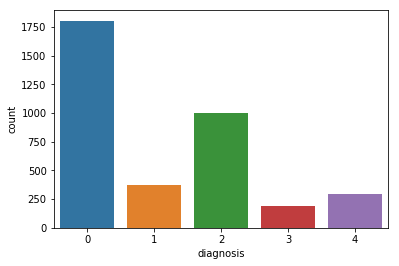

In [0]:
sns.countplot('diagnosis', data=train_df)

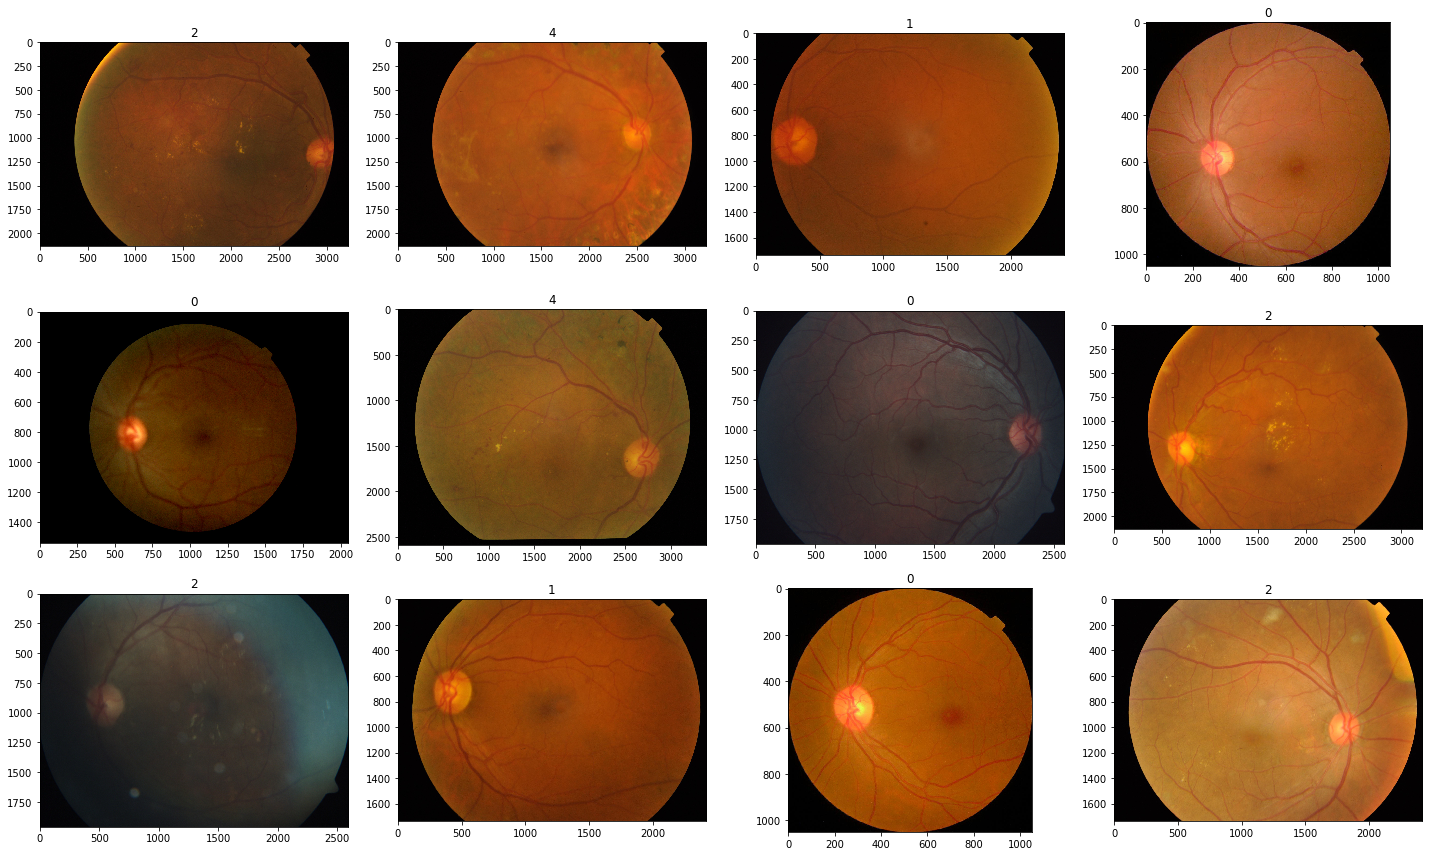

In [0]:
# display image from kernel : densenet-keras-starter

def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'/content/train_images/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

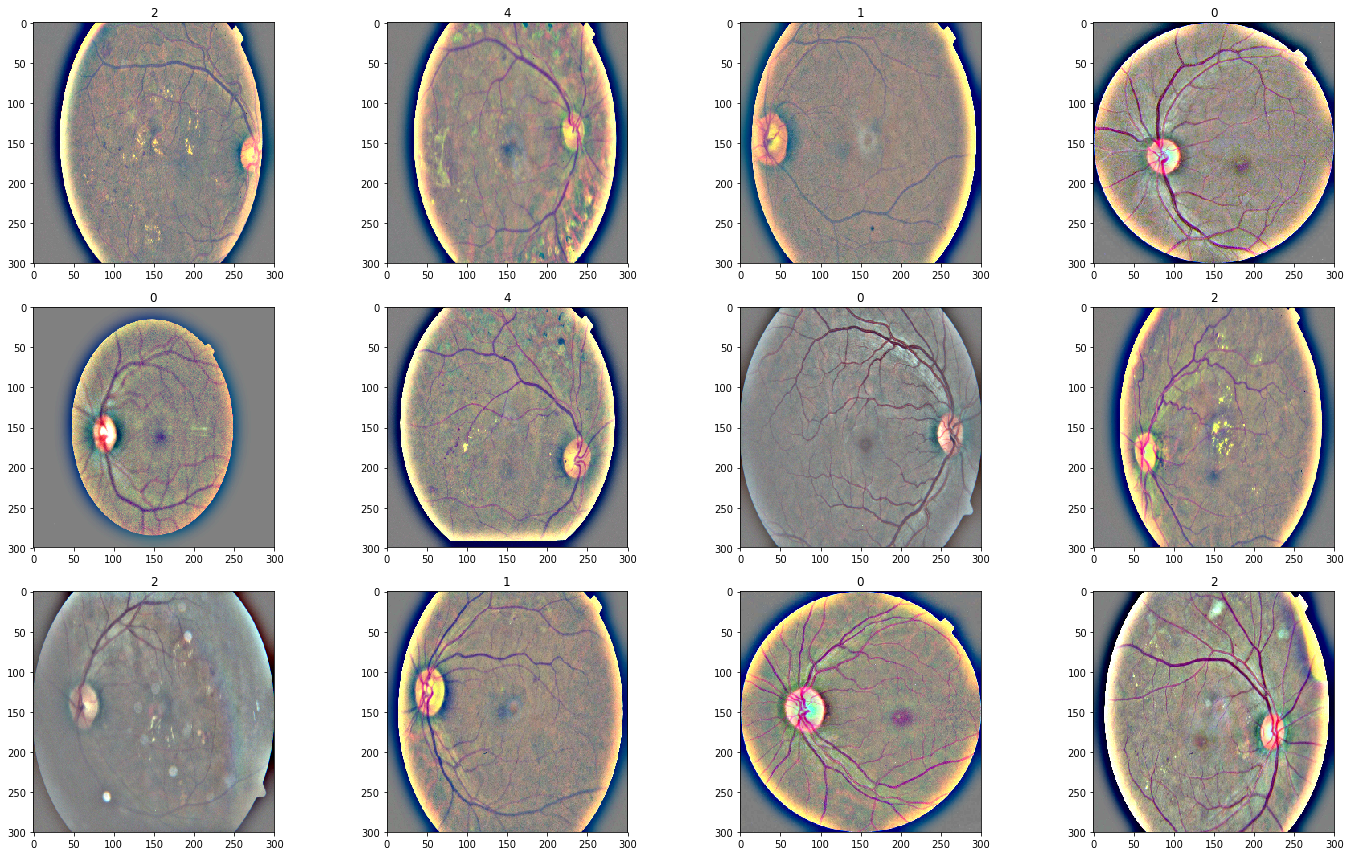

In [0]:
# display image from kernel : densenet-keras-starter

def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'/content/preprocess_train_v2/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

In [0]:
train_df.shape

(3662, 3)

In [0]:
train_df.head()

,id_code,diagnosis,img_path
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


In [0]:
train_df['diagnosis'] = train_df['diagnosis'].astype('str')

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 3 columns):
id_code      3662 non-null object
diagnosis    3662 non-null object
img_path     3662 non-null object
dtypes: object(3)
memory usage: 85.9+ KB


In [0]:
x= train_df[['id_code','img_path']]
y= train_df['diagnosis']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1228, stratify = y)

In [0]:
X_train.head()

,id_code,img_path
2225,9c514d2d5b3f,9c514d2d5b3f.png
2405,a8263d248523,a8263d248523.png
1252,57760be09c03,57760be09c03.png
2133,9688c6ef5dc5,9688c6ef5dc5.png
1852,82deb07a6618,82deb07a6618.png


In [0]:
y_train.head()

2225    0
2405    0
1252    2
2133    0
1852    2
Name: diagnosis, dtype: object

In [0]:
x_train_full = pd.concat([X_train, y_train], axis=1)
x_test_full = pd.concat([X_test, y_test], axis=1)

In [0]:
x_train_full.head()

,id_code,img_path,diagnosis
2225,9c514d2d5b3f,9c514d2d5b3f.png,0
2405,a8263d248523,a8263d248523.png,0
1252,57760be09c03,57760be09c03.png,2
2133,9688c6ef5dc5,9688c6ef5dc5.png,0
1852,82deb07a6618,82deb07a6618.png,2


In [0]:
img_size = 300
img_dir = '/content/preprocess_train_v2'
batch_size = 16

In [0]:
train_datagen = image.ImageDataGenerator(rotation_range=360, 
                                        horizontal_flip =True,
                                        vertical_flip =True,                                        
                                        rescale = 1./255)

valid_datagen = image.ImageDataGenerator(rescale = 1./255)





train_generator = train_datagen.flow_from_dataframe(x_train_full, 
                                                    directory = img_dir, 
                                                    x_col = 'img_path', 
                                                    y_col = 'diagnosis', 
                                                    target_size = (img_size, img_size), 
                                                    class_mode = 'categorical', 
                                                    batch_size=batch_size)


valid_generator = valid_datagen.flow_from_dataframe(x_test_full, 
                                                    directory = img_dir, 
                                                    x_col = 'img_path', 
                                                    y_col = 'diagnosis', 
                                                    target_size = (img_size, img_size), 
                                                    class_mode = 'categorical', 
                                                    batch_size=batch_size, 
                                                    shuffle=False)

Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [0]:
counter = 0
for i in valid_generator:
  print(i[0].shape)
  counter += 1
  if counter == 1:
    break

(16, 300, 300, 3)


In [0]:
train_step = np.ceil(train_generator.n // train_generator.batch_size)
test_step = np.ceil(valid_generator.n // valid_generator.batch_size)

print(train_step)
print(test_step)

183.0
45.0


In [0]:
len(valid_generator.next())

2

In [0]:
# pred_test = model.predict_generator(valid_generator, steps = np.ceil(val_generator.n / val_generator.batch_size))

In [0]:
# np.array(val_generator.labels).shape

In [0]:
# test_list = []
# test_list.append(np.argmax(pred_test, axis=1))

# test_list[0]

In [0]:
# test_list[0].shape

In [0]:
def get_preds_and_labels(model, generator):
  
  preds = []
  labels = []
  generator.reset()
  pred_test = model.predict_generator(generator, steps = np.ceil(generator.n / generator.batch_size))
  pred_test = np.argmax(pred_test, axis=1)
  true_label = np.array(generator.labels)
  
  preds.append(pred_test)
  labels.append(true_label)
  
  return preds[0], labels[0]

In [0]:
class Metrics(Callback):
    """
    A custom Keras callback for saving the best model
    according to the Quadratic Weighted Kappa (QWK) metric
    """
    def on_train_begin(self, logs={}):
        """
        Initialize list of QWK scores on validation data
        """
        self.val_kappas = []

    def on_epoch_end(self, epoch, logs={}):
        """
        Gets QWK score on the validation data
        """
        # Get predictions and convert to integers
        y_pred, labels = get_preds_and_labels(model, valid_generator)
        
        
        # We can use sklearns implementation of QWK straight out of the box
        # as long as we specify weights as 'quadratic'
        _val_kappa = cohen_kappa_score(labels, y_pred, weights='quadratic')
        self.val_kappas.append(_val_kappa)
        
        print(f"val_kappa: {round(_val_kappa, 4)}")
        
        if _val_kappa == max(self.val_kappas):
            print("Validation Kappa has improved. Saving model.")
            self.model.save('callback_model.h5')
        return

In [0]:
call_kapp = Metrics()
call_lr_reduce = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=5, min_lr = 1e-9)

In [0]:
my_opt = optimizers.nadam(lr = 0.001)

In [0]:
effib3 = EfficientNetB3(include_top =False)

model = models.Sequential()
model.add(effib3)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = my_opt, metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Model)      (None, 10, 10, 1536)      10783528  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1536)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               786944    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 1285      
Total params: 11,965,741
Trainable params: 11,878,445
Non-trainable params: 87,296
___________________________________________________________

In [59]:
model.fit_generator(train_generator, 
                    steps_per_epoch=train_step, 
                    epochs=100, 
                    callbacks=[call_kapp, call_lr_reduce], 
                    validation_data = valid_generator, 
                    validation_steps=test_step)

Epoch 1/100
183/183 [==============================] - 284s 2s/step - loss: 1.3027 - acc: 0.4867 - val_loss: 5.6644 - val_acc: 0.4937
val_kappa: 0.044
Validation Kappa has improved. Saving model.
Epoch 2/100
183/183 [==============================] - 240s 1s/step - loss: 1.1033 - acc: 0.5994 - val_loss: 3.4715 - val_acc: 0.2736
val_kappa: 0.0
Epoch 3/100
183/183 [==============================] - 240s 1s/step - loss: 0.9790 - acc: 0.6581 - val_loss: 0.8894 - val_acc: 0.7043
val_kappa: 0.674
Validation Kappa has improved. Saving model.
Epoch 4/100
183/183 [==============================] - 238s 1s/step - loss: 0.9110 - acc: 0.6837 - val_loss: 1.6892 - val_acc: 0.4031
val_kappa: 0.2399
Epoch 5/100
183/183 [==============================] - 240s 1s/step - loss: 0.8709 - acc: 0.6940 - val_loss: 1.2242 - val_acc: 0.6109
val_kappa: 0.5782
Epoch 6/100
183/183 [==============================] - 240s 1s/step - loss: 0.8692 - acc: 0.6957 - val_loss: 2.3714 - val_acc: 0.3208
val_kappa: 0.0897
Epo